### About Dataset
This Machine learning practice makes utilizes the UCI Heart Disease dataset, which includes information from 303 heart disease patients and 165 healthy individuals. Recall, accuracy, precision, and model comparison are just a few of the performance metrics that can be evaluated using this dataset. While ensuring a comprehensive assessment of their predictive capacities, these factors will assist in determining how well various categorisation algorithms recognise heart disease.

### Loading Necessary libraries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #For splitting dataset
from sklearn.model_selection import cross_val_score #For evaluating model perfomance
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [182]:
df = pd.read_csv("/Users/lola/Downloads/heart+disease/processed.cleveland.data", header = None)

In [183]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


No header or column name in the downloaded dataset, so we name the column using feature specified by the data source 

In [184]:
df.columns = ['age','sex', 'cp','restbp', 'chol', 'fbs','restecg', 'thalach','exang','oldpeak','slope', 'ca', 'thal','hd']

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


From the info output, the columns all contain 303 entries/rows. Shows no missing value. This can be confirmed further using is.null

In [186]:
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [187]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

This output indicates: 
float64: Columns with numbers, which may include decimal points.
int64: Columns with whole numbers (integers).
object: Columns with text or mixed data types, probably has some missing or non-numeric values in these columns, so they’re treated as text.

In [188]:
df["slope"].unique

<bound method Series.unique of 0      3.0
1      2.0
2      2.0
3      3.0
4      1.0
      ... 
298    2.0
299    2.0
300    2.0
301    2.0
302    1.0
Name: slope, Length: 303, dtype: float64>

In [189]:
df["thal"].unique() #To check for possible unique vales or datatype

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [190]:
df.loc[(df["ca"] == "?" ) | (df["thal"] == "?")]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Removing the rows with non-specific values like ?

In [191]:
cleaned_df = df.loc[(df["ca"] != "?" ) & (df["thal"] != "?")]

In [192]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


### Spliting dataset to dependent and Independent before training

In [193]:
X = cleaned_df.drop("hd", axis = 1).copy() #Copying all the columns except **hd** column to X, the dependent variable
#X = cleaned_df.iloc[:, -1] 

In [194]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
dtypes: float64(11), object(2)
memory usage: 32.5+ KB


In [195]:
y = cleaned_df["hd"].copy()

In [196]:
y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

In [197]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

### Sorting out Categorical features in both X and y.
This is best understood by checking if unique values are in each column or by using the dataset documentaion to get a quick idea. Then categorizing them accordingly using chosen encoding method.
Also, One-hot encoding method only needs to adjust for features with more than two categorical data. This ones with just two standard digits of 0 and 1 are left as they are
#### One hot Encoding
This can be done either in pandas using get_dummies or scikit learn using ColumnTransform method.

#### Using unique to check for some features
This is done to identify features that needs to be categorized/factored using one hot encoding

In [198]:
X["age"].unique()


array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
       71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
       74., 76.])

In [199]:
X["cp"].unique()

array([1., 4., 3., 2.])

In [200]:
X["restbp"].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.])

In [201]:
X["chol"].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 160., 394., 184., 315., 409., 244., 195., 196.,
       126., 313., 259., 200., 262., 215., 228., 193., 271., 210., 327.,
       149., 295., 306., 178., 237., 218., 223., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [202]:
X["fbs"].unique()

array([1., 0.])

In [203]:
X["thalach"].unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 149., 145., 146., 175., 186.,
       185., 159., 130., 190., 136.,  97., 127., 154., 133., 126., 202.,
       103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105., 194.,
       195., 106., 115., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.])

In [204]:
X["slope"].unique()

array([3., 2., 1.])

In [205]:
X["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [206]:
X["thal"].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

##### From this check using unique, we can decide the features to conduct one hot encoding on

In [207]:
X.value_counts()

age   sex  cp   restbp  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal
29.0  1.0  2.0  130.0   204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0     1
59.0  1.0  4.0  164.0   176.0  1.0  2.0      90.0     0.0    1.0      2.0    2.0  6.0     1
                138.0   271.0  0.0  2.0      182.0    0.0    0.0      1.0    0.0  3.0     1
                135.0   234.0  0.0  0.0      161.0    0.0    0.5      2.0    0.0  7.0     1
                110.0   239.0  0.0  2.0      142.0    1.0    1.2      2.0    1.0  7.0     1
                                                                                         ..
51.0  1.0  3.0  110.0   175.0  0.0  0.0      123.0    0.0    0.6      1.0    0.0  3.0     1
                100.0   222.0  0.0  0.0      143.0    1.0    1.2      2.0    0.0  3.0     1
                94.0    227.0  0.0  0.0      154.0    1.0    0.0      1.0    1.0  7.0     1
           1.0  125.0   213.0  0.0  2.0      125.0    1.0    1.4      1.0    1.0  3.0

In [208]:
X_encoded = pd.get_dummies(X, columns=["cp", "restecg", "slope", "thal"]) #One hot encoding performed on selected features

In [209]:
X_encoded

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,False,...,True,True,False,False,False,True,False,False,False,True
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,True,...,False,True,False,False,False,True,False,False,False,True
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,False,...,True,True,False,False,False,True,False,False,False,True
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,False,...,True,True,False,False,False,True,False,False,False,True


#### Checking the independent variable, y for unique values before proceeding


In [210]:
y.unique()

array([0, 2, 1, 3, 4])

In [211]:
y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

Since it is a classification tree requiring binary output, we need to adjust for this too. Using the simplest form of setting all greater than 1 = risk of heart attack

In [212]:
y[y>0] = 1

In [213]:
y.unique()

array([0, 1])

After completing the above steps. That is,
+ Importing Libraries
+ Loading Data and preprocessing dataset
+ Checking and solving for missing
+ Separating independent and dependent feature by dropping y column in X and selecting or copying just Feature needed for y
+ Checking for unique features with categorical data requiring one hot encoding

### Classification Tree Prep
+ Split Data: We divide data into training and testing sets.
+ Instantiate Model: Create a model instance. For decision tree in this case
+ Fit Model: Train the model with the training data.
+ Make Predictions: Predict outcomes for the test data.
+ Evaluate Performance: Measure model performance with evaluation metrics.


In [214]:
#Splitting training and Test data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42) #test_size can be specified as 0.2 but default is used

In [215]:
#Creating a decision tree
cdt = DecisionTreeClassifier() #Initialize tree
cdt_df = cdt.fit(X_train, y_train)

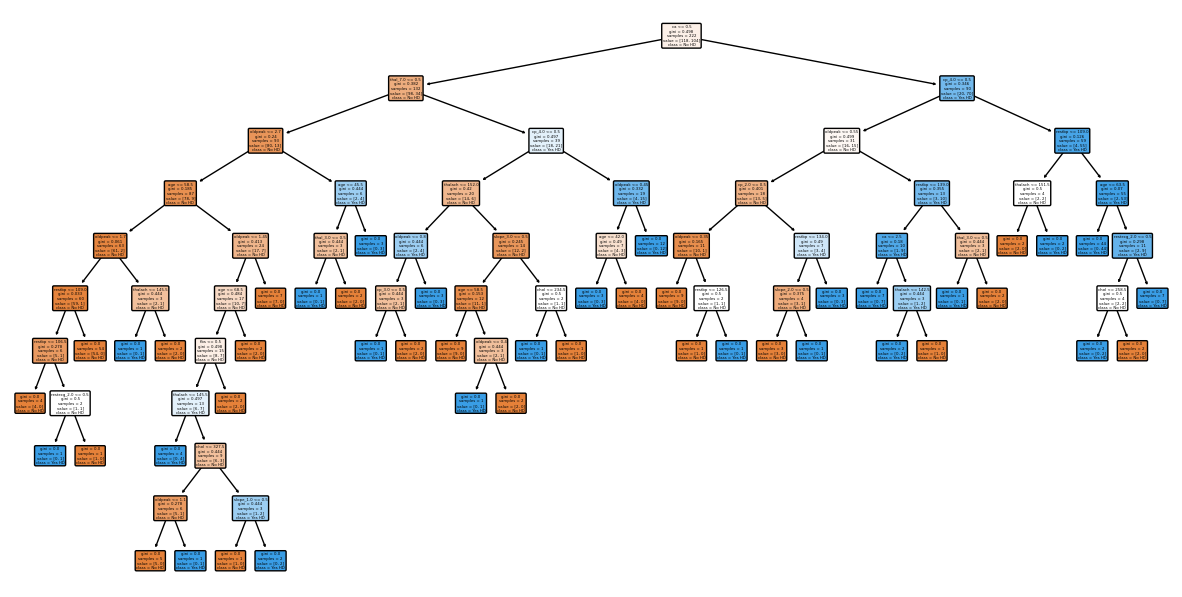

In [216]:
plt.figure(figsize=(15, 7.5))

# Plot of the decision tree utilizing all possible leaves
plot_tree(cdt_df,
          filled=True,          # Color the nodes based on the class
          rounded=True,        # Round the corners of the nodes
          class_names=["No HD", "Yes HD"],  # Class labels
          feature_names=X_encoded.columns)   # Feature names

# Show the plot
plt.show()

In [217]:
prediction = cdt_df.predict(X_test)

In [218]:
prediction

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1])

In [219]:
initial_cm = confusion_matrix(y_test, prediction)

In [220]:
initial_cm

array([[31, 11],
       [ 6, 27]])

#### Confusion Matrix Plot for default Prediction

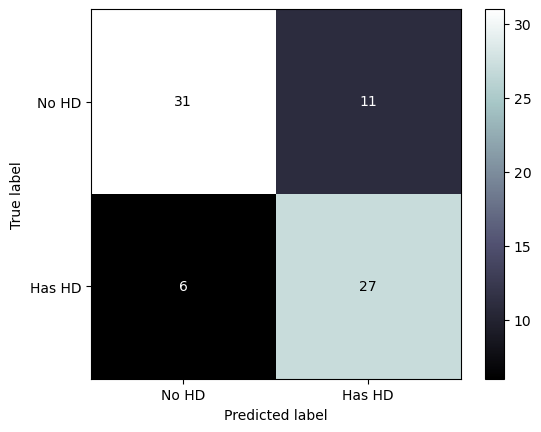

In [221]:
ConfusionMatrixDisplay.from_estimator(cdt_df, X_test, y_test, display_labels=["No HD", "Has HD"], cmap="bone")

In the evaluation of the model, out of 33 actual positive cases of heart disease, 26 were correctly predicted as positive, while 9 were incorrectly identified as negative. Additionally, out of 42 individuals without heart disease, 33 were correctly identified as healthy, while 7 were misclassified as having the disease.

**Sensitivity** = 26/26+7=26/33≈79%
This indicates that 79% of patients with heart disease were correctly identified.

**Specificity (True Negative Rate)** = 33/33+9 =33/42≈79%
This indicates that 79% of individuals without heart disease were accurately identified.

In [222]:
initial_accuracy = accuracy_score(y_test, prediction)

In [223]:
initial_accuracy

0.7733333333333333

### Pruning the Data: Cost-Complexity Pruning (deleting unnecessary nodes)
Cost-complexity pruning is sed to improve model performance by addressing overfitting in decision trees. It involves adjusting parameters, such as the number of leaves and the maximum depth of the tree, to enhance generalization and accuracy.

To determine the optimal value for the hyperparameter alpha, if it is a regression tree
**SSR + 𝛼 × (number of leaves per tree)**
where SSR stands for the Sum of Squared Residuals.

Cost-complexity pruning involves generating a series of decision trees with different alpha values. Each tree is then evaluated based on performance metrics, such as accuracy, to identify the alpha value that yields the best model performance.

In [224]:
#Setting up cost-complexity pruning
path = cdt_df.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities 
ccp_alphas = ccp_alphas[:-1] # excludes the maximum value for alpha

In [225]:
# List to store the accuracy for each alpha
train_accuracies = []
test_accuracies = []

In [226]:
### Loop over different alphas to train and evaluate pruned trees
for alpha in ccp_alphas:
    # Train a decision tree with the current alpha value
    dT = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha) #New decision tree initialization based on alpha pruning parameter tuning
    dT.fit(X_train, y_train)
    
    # Assigns accuracy to the list created
    train_accuracies.append(dT.score(X_train, y_train))
    test_accuracies.append(dT.score(X_test, y_test))


### Plot of accuracy vs. alpha to find and visualize the alpha

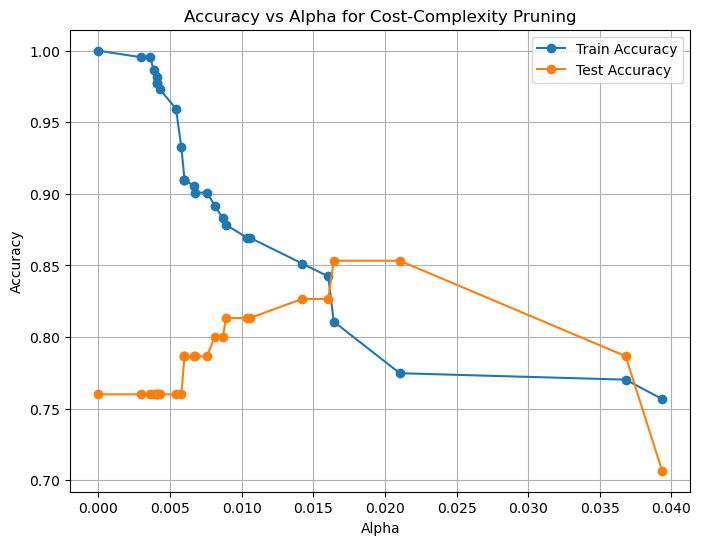

In [227]:
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(ccp_alphas, test_accuracies, marker='o', label="Test Accuracy")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Cost-Complexity Pruning")
plt.legend()
plt.grid(True)
plt.show()

At the full-size tree, the training dataset achieved a performance of 100%, while the testing dataset, in comparison, did not perform well. This discrepancy is a clear indicator of overfitting (high variance). However, as the tree size decreases, the testing accuracy improves, indicating that the results are becoming more aligned. The optimal alpha value was selected based on the point where the test accuracy stabilizes or begins to decline.

**Note:** The alpha values appear smaller compared to those used in regression trees, which rely on the Sum of Squared Residuals (SSR) and can lead to larger alpha values. In this context, the Gini impurity or total Gini impurities are used, which typically yield smaller values since Gini values range from 0 to 1.

In [228]:
optimal_alpha = 0.02
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)
pruned_predict = pruned_tree.predict(X_test)
pruned_accuracy = accuracy_score(y_test, pruned_predict)
pruned_CM = confusion_matrix(y_test, pruned_predict)

In [229]:
pruned_accuracy

0.8533333333333334

In [230]:
pruned_CM

array([[40,  2],
       [ 9, 24]])

After tuning the alpha parameter, the model achieved the following performance metrics:

Accuracy: 85.3%
Sensitivity: 81.6%
Specificity: 92%
In comparison, the default model (without alpha parameter tuning) yielded the following metrics:

Accuracy: 78.7%
Sensitivity: 79%
Specificity: 79%
This shows a significant improvement in the model's performance after tuning the alpha parameter, particularly in accuracy and specificity.

### Cross-Validation for Alpha Selection
Cross-validation is used to evaluate whether the best training or testing dataset was utilized in selecting the optimal alpha value, rather than relying solely on the initial split. By partitioning the dataset into multiple subsets, it helps to ensure that the selected alpha generalizes well across different data distributions

In [231]:
cv_scores = []

for alpha in ccp_alphas:
    pruned_tree_cv = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    scores = cross_val_score(pruned_tree_cv, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append([alpha, scores.mean(), scores.std()])  # Append alpha, mean accuracy, and std



In [232]:
# Convert to DataFrame for easy plotting
cv_scores_df = pd.DataFrame(cv_scores, columns=['alpha', 'mean_accuracy', 'std'])

# To find the optimal alpha corresponding to the maximum mean accuracy
optimal_index = np.argmax(cv_scores_df['mean_accuracy'])  # Get index of max mean accuracy
optimal_index

21

In [233]:
optimal_alpha = cv_scores_df['alpha'][optimal_index]  # We get corresponding alpha for the index generated
optimal_alpha

0.014224751066856332

The highest mean cross_validation accuracy is now around 0.014, as opposed to 0.016

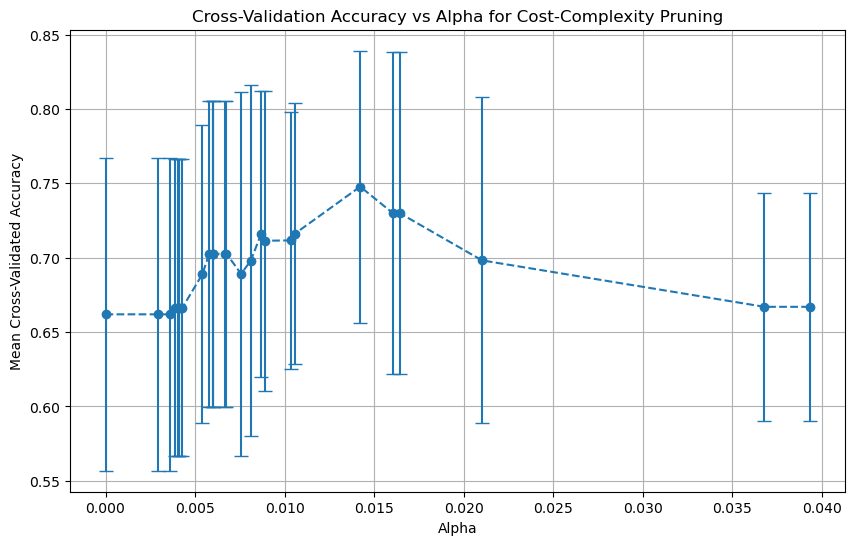

In [234]:
# Plot mean accuracy vs. alpha with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(cv_scores_df['alpha'], 
             cv_scores_df['mean_accuracy'], 
             yerr=cv_scores_df['std'], 
             fmt='o',  # Marker style
             linestyle='--',  # Line style
             capsize=5)  # Error bar cap size
plt.xlabel("Alpha")
plt.ylabel("Mean Cross-Validated Accuracy")
plt.title("Cross-Validation Accuracy vs Alpha for Cost-Complexity Pruning")
plt.grid(True)
plt.show()

The plot also help to confirm the best alpha value based on the accuracy

### Final Classification Tree Using the Optimal Alpha value

In [235]:
final_tree = DecisionTreeClassifier(random_state=42, ccp_alpha = optimal_alpha)
final_tree.fit(X_train, y_train)
final_tree_predict = final_tree.predict(X_test)

In [236]:
final_cm = confusion_matrix(y_test, final_tree_predict)

In [237]:
final_cm

array([[34,  8],
       [ 5, 28]])

In [238]:
final_accuracy = accuracy_score(y_test, final_tree_predict)

In [239]:
final_accuracy

0.8266666666666667

<Figure size 800x600 with 0 Axes>

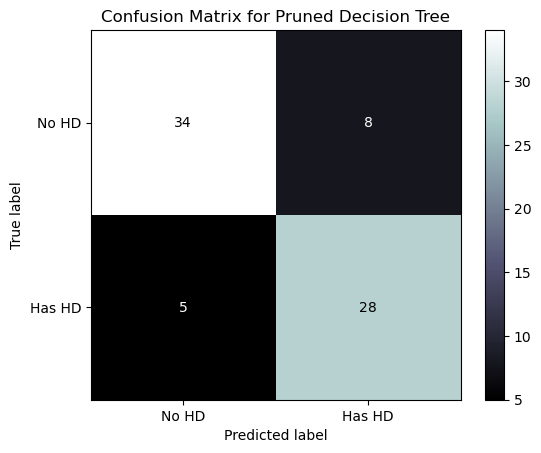

In [240]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(final_tree, X_test, y_test, display_labels=["No HD", "Has HD"], cmap="bone")
plt.title("Confusion Matrix for Pruned Decision Tree")
plt.show()

After pruning the decision tree using cost-complexity pruning (CCP) and determining the optimal alpha value, the final classification model achieved the following performance metrics:
Sensitivity: 84%
Specificity: 81%
Accuracy: 82.7%
These results indicates a well-balanced model performance following the pruning process.



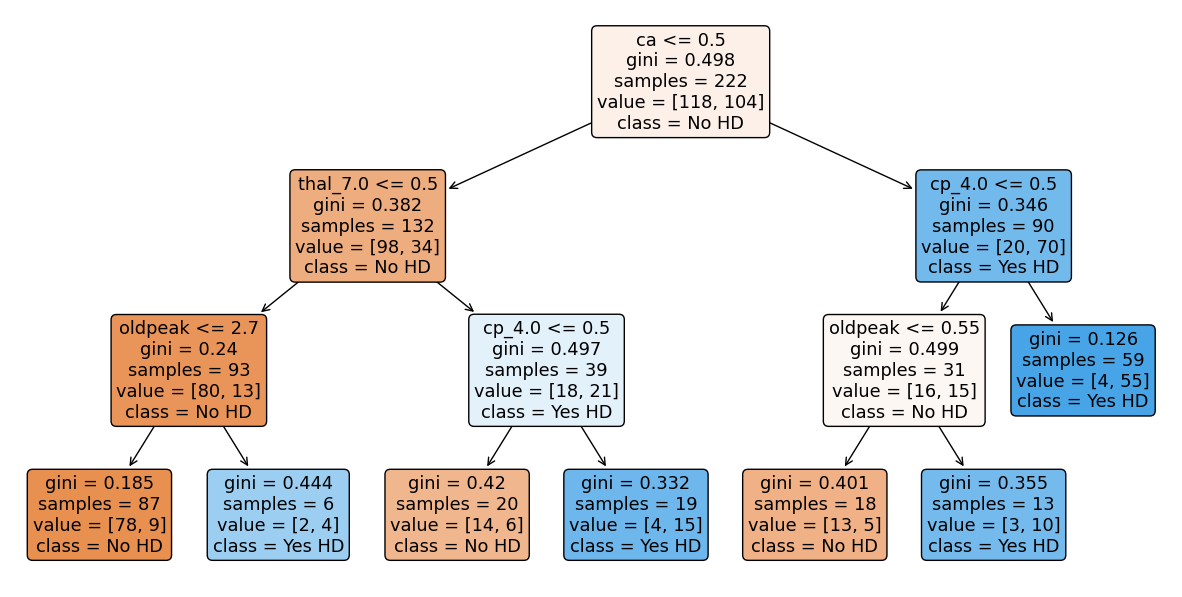

In [241]:
plt.figure(figsize=(15, 7.5))

# Plot the decision tree
plot_tree(final_tree,
          filled=True,          # Color the nodes based on the class
          rounded=True,        # Round the corners of the nodes
          class_names=["No HD", "Yes HD"],  # Class labels
          feature_names=X_encoded.columns)   # Feature names

# Show the plot
plt.show()

Using the Gini impurity property, darker colors (blue/orange) represent lower Gini values, indicating better predictive performance. Lower Gini values suggest that the model is making more accurate predictions. Notably, almost all leaf nodes end in a darker shade, reflecting the model's improved classification accuracy.



### Alternative Methods Asides Pruning
Another method to control overfitting in decision trees like this is adjusting the **max_depth hyperparameter**. By default, max_depth is set to None, allowing unlimited growth. Reducing this parameter helps regularize the model and decreases the risk of overfitting.

The DecisionTreeClassifier class also includes several other parameters that can restrict the tree's shape:
+ min_samples_split: Minimum number of samples required to split a node.
+ min_samples_leaf: Minimum number of samples a leaf node must contain.
+ min_weight_fraction_leaf: Similar to min_samples_leaf, but expressed as a fraction of the total weighted instances.
+ max_leaf_nodes: Maximum number of leaf nodes allowed in the tree.
+ max_features: Maximum number of features considered for splitting at each node.

Increasing the min_ hyperparameters or decreasing the max_ hyperparameters will help regularize the model. 

Additionally, a node is deemed unnecessary if the purity improvement it offers is not statistically significant, particularly when all its children are leaf nodes.



### Comparing the performance of different classifiers

In [242]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
print("The score for logistic regression is:", accuracy_score(y_test, log_reg_predict))
    

The score for logistic regression is: 0.9066666666666666


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 800x600 with 0 Axes>

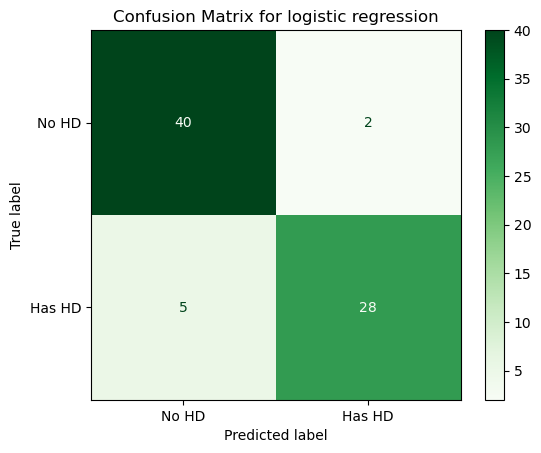

In [243]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, display_labels=["No HD", "Has HD"], cmap="Greens")
plt.title("Confusion Matrix for logistic regression")
plt.show()

In [244]:
rnd_frt = RandomForestClassifier(random_state=42)
rnd_frt.fit(X_train, y_train)
rnd_frt_predict = rnd_frt.predict(X_test)
print("The score for random forest is:", accuracy_score(y_test, rnd_frt_predict))
    

The score for random forest is: 0.88


<Figure size 800x600 with 0 Axes>

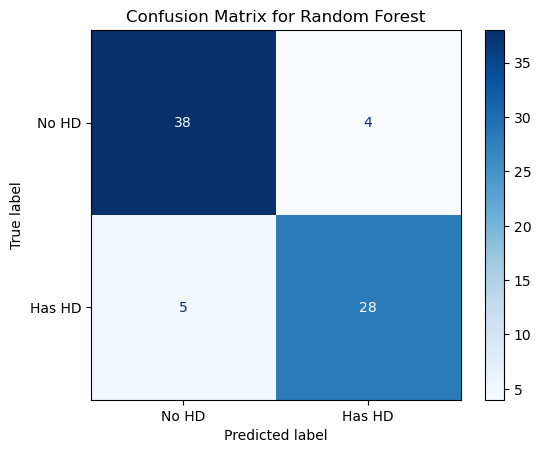

In [245]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rnd_frt, X_test, y_test, display_labels=["No HD", "Has HD"], cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.show()